In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.animation as animation

In [46]:
class ConwaysGame:

    def __init__(self, grid_size=(80,80), prob_if_0 = [0,0,0,1.0,0,0,0,0,0], prob_if_1=[0,0,1.0,1.0,0,0,0,0,0]):
        """

        grid_size: 2D tuple defining size of grid life is playing on
        prob_if_0: list of bernoulli probabilities where the ith element of the list represents the probability for 
            drawing a bernoulli yes if a cell with a 0 value has i neighbors with a 1 value.
        prob_if_1: list of bernoulli probabilities where the ith element of the list represents the probability for 
            drawing a bernoulli yes if a cell with a 1 value has i neighbors with a 1 value
        """
        self.prob_if_0 = prob_if_0
        self.prob_if_1 = prob_if_1
        self.grid_size = grid_size
        self.grid_l = grid_size[0]
        self.grid_w = grid_size[1]
        self.init_grid()


    def init_grid(self):
        p_ones = 0.4
        np.random.seed(42069)
        self.grid = np.random.choice([0,1], self.grid_size, p=((1-p_ones),p_ones)) # seed random start 
        self.grids = []
        self.grids.append(self.grid)
        
    def lookup_neighbor_vals(self, i,j):
        # return right index
        neighbors_list = []
        neighbor_indices = [[i+i,j], [i-1,j],[i,j+1],[i,j-1],[i+1, j+1],[i+1,j-1],[i-1,j+1],[i-1,j-1]]
        for neighbor in neighbor_indices:
            try: 
                n_val = self.grid[neighbor[0], neighbor[1]]
            except:
                n_val = 0
            neighbors_list.append(n_val)
        return neighbors_list

    def update_cell(self, cell_i, cell_j):
        cell_val = self.grid[cell_i, cell_j]
        neighbor_vals = self.lookup_neighbor_vals(cell_i, cell_j)
        total_neighbors = int(np.sum(neighbor_vals))
        if cell_val==0:
            new_val = np.random.binomial(1, self.prob_if_0[total_neighbors])
        elif cell_val==1:
            new_val = np.random.binomial(1, self.prob_if_1[total_neighbors])
        return new_val

    def update_grid(self):
        new_grid = np.zeros(self.grid_size)
        self.track_ids = []
        for i in range(0, self.grid_l):
            for j in range(0, self.grid_w):
                self.track_ids.append([i,j])
                new_grid[i,j] = self.update_cell(i,j)
        self.grid = new_grid
        self.grids.append(self.grid)

    def run_game_for_x_turns(self, x=160):
        for i in range(0, x):
            self.update_grid()
        self.turns = x

    def visualize_game(self, save=False):
        N_plots= self.turns
        fig,ax = plt.subplots()
        
        ims = []
        for i in range(0,N_plots):
            im = ax.matshow(game_obj.grids[i], animated=True)
            ims.append([im])
        ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True,
                                        repeat_delay=1000)
        writergif = animation.PillowWriter(fps=3) 
        if save:
            ani.save("prob_gol.gif")
                
        
    
        





In [47]:
game_obj = ConwaysGame(prob_if_0 = [0,0,0.1,1.0,0,0,0,0,0], prob_if_1=[0,0,1.0,1.0,0,0,0,0,0])



In [48]:
game_obj.run_game_for_x_turns()

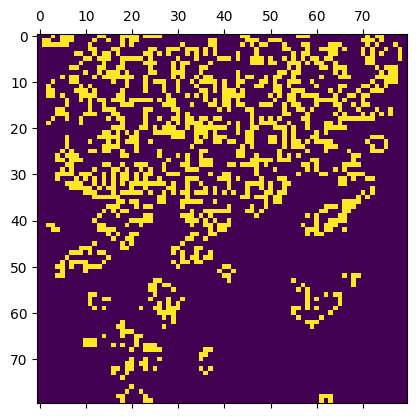

In [49]:
game_obj.visualize_game(save=True)